In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from dython.nominal import associations, cluster_correlations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('../south_german_credit_data_preprocessed.csv')

In [3]:
df.head()

,checking account,duration in month,credit history,credit purpose,credit amount,savings account,employment since..,installment rate,status : sex,other debtors / guarantors,...,property,relationship : age,other installment plans,housing,existing credits,job,people to provide maintenance for,telephone,foreign worker,goodness
0,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
1,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
2,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
3,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
4,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1


# Explanation on the Dataset:

We are gathering and combining the information from the website, codetable.txt, r-file as well as our preprocessed dset.

**Checking Account**

Content: status of the debtor's checking account with the bank (categorical)

 1 : no checking account                       
 2 : ... < 0 DM                                
 3 : 0<= ... < 200 DM                          
 4 : ... >= 200 DM / salary for at least 1 year
 
**Duration in month**

Content: credit duration in months (quantitative)

**credit_history**

Content: history of compliance with previous or concurrent credit contracts (categorical)

 0 : delay in paying off in the past            
 1 : critical account/other credits elsewhere   
 2 : no credits taken/all credits paid back duly
 3 : existing credits paid back duly till now   
 4 : all credits at this bank paid back duly 
 
**credit_purpose**

Content: purpose for which the credit is needed (categorical)

 0 : others             
 1 : car (new)          
 2 : car (used)         
 3 : furniture/equipment
 4 : radio/television   
 5 : domestic appliances
 6 : repairs            
 7 : education          
 8 : vacation           
 9 : retraining         
 10 : business  
 
**credit_amount**

Content: credit amount in DM (quantitative; result of monotonic transformation; actual data and type of
transformation unknown)

**savings_account**

Content: debtor's savings (categorical)

 1 : unknown/no savings account
 2 : ... <  100 DM             
 3 : 100 <= ... <  500 DM      
 4 : 500 <= ... < 1000 DM      
 5 : ... >= 1000 DM  
 
**employment_since**

Variable name: employment_duration
Content: duration of debtor's employment with current employer (ordinal; discretized quantitative)

 1 : unemployed      
 2 : < 1 yr          
 3 : 1 <= ... < 4 yrs
 4 : 4 <= ... < 7 yrs
 5 : >= 7 yrs        

**installment_rate**

Variable name: installment_rate
Content: credit installments as a percentage of debtor's disposable income (ordinal; discretized quantitative)
 1 : >= 35         
 2 : 25 <= ... < 35
 3 : 20 <= ... < 25
 4 : < 20   
 
**status:sex**

Content: combined information on sex and marital status; categorical; sex cannot be recovered from the
variable, because male singles and female non-singles are coded with the same code (2); female widows cannot
be easily classified, because the code table does not list them in any of the female categories

 1 : male : divorced/separated           
 2 : female : non-single or male : single
 3 : male : married/widowed              
 4 : female : single  
 
**other_debtors/guruantors**

Variable name: other_debtors
Content: Is there another debtor or a guarantor for the credit? (categorical)

 1 : none        
 2 : co-applicant
 3 : guarantor  

**present_residence**

Content: length of time (in years) the debtor lives in the present residence (ordinal; discretized quantitative)

 1 : < 1 yr          
 2 : 1 <= ... < 4 yrs
 3 : 4 <= ... < 7 yrs
 4 : >= 7 yrs 
 
**property**

Content: the debtor's most valuable property, i.e. the highest possible code is used. Code 2 is used, if codes 3
or 4 are not applicable and there is a car or any other relevant property that does not fall under variable
sparkont. (ordinal)

 1 : unknown / no property       
 2 : car or other                             
 3 : building soc. savings agr./life insurance
 4 : real estate   
 
**relationship:age**

Content: age in years (quantitative)

**other installment plans**

Variable name: other_installment_plans
Content: installment plans from providers other than the credit-giving bank (categorical)

 1 : bank  
 2 : stores
 3 : none  
 
**housing**

Content: type of housing the debtor lives in (categorical)

 1 : for free
 2 : rent    
 3 : own     

**existing_credits**

Variable name: number_credits
Content: number of credits including the current one the debtor has (or had) at this bank (ordinal, discretized
quantitative); contrary to Fahrmeir and HamerleÃ¢â‚¬â„¢s (1984) statement, the original data values are not available.

 1 : 1   
 2 : 2-3 
 3 : 4-5 
 4 : >= 6
 
**job**

Content: quality of debtor's job (ordinal)

 1 : unemployed/unskilled - non-resident       
 2 : unskilled - resident                      
 3 : skilled employee/official                 
 4 : manager/self-empl./highly qualif. employee
 
**people to provide maintenance for**

Content: number of persons who financially depend on the debtor (i.e., are entitled to maintenance) (binary,
discretized quantitative)

 1 : 3 or more
 2 : 0 to 2   
 
**telephone**

Content: Is there a telephone landline registered on the debtor's name? (binary; remember that the data are
from the 1970s)

 1 : no                       
 2 : yes (under customer name)
 
**foreign worker**

Content: Is the debtora foreign worker? (binary)

 1 : yes
 2 : no
 
**credit_risk**

Content: Has the credit contract been complied with (good) or not (bad) ? (binary)

 0 : bad 
 1 : good
 
 ## Some Initial Thoughts on the Data
 Since this is data from the 70s, the context of the times was very different from today, and this will probably be in the data too:
 * This data was probably not even gathered computer-assisted
 * Decisions back then where done by human
 * Biases against women and minorities where substantially worse than today.
 * Things like telephone and cars were relatively common, but by no means something every household would have.

### Drop First Line

In [4]:
df.drop(index=df.index[0], 
        axis=0, 
        inplace=True)

df.head()

,checking account,duration in month,credit history,credit purpose,credit amount,savings account,employment since..,installment rate,status : sex,other debtors / guarantors,...,property,relationship : age,other installment plans,housing,existing credits,job,people to provide maintenance for,telephone,foreign worker,goodness
1,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
2,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
3,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
4,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
5,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


### Rename Categorical Columns to human readable values

In [5]:
readable_df = df.replace( {'checking account':   {'1': 'No Account', '2':'<0 DM', '3':'0-200 DM', '4':'>=200 DM'},
             'credit history':     {'0': 'past delay', '1':'critical/open', '2':'none open', '3':'paid open rates', '4': 'fully paid back'},
             'credit purpose':     {'0': 'others', '1': 'car (new)','2' : 'car (used)','3' : 'furniture/equipment','4' : 'radio/television','5': 'domestic appliances','6':'repairs','7':'education','8':'vacation','9':'retraining','10':'business'},
             'savings account':    {'1': 'unknown/no savings account','2': '<100 DM','3':'100-500 DM','4':'500-1000 DM','5':'>=1000 DM'},
             'employment since..': {'1': 'unemployed','2':'<1 yr','3': '1-3 yrs','4' :'4-6 yrs','5': '>= 7 yrs'},
             'installment rate':   {'1': '>= 35', '2': '25-34','3' : '20-24','4' : '<20'},
             'status : sex':       {'1': 'male : divorced/separated','2': 'female: non-single or male: single','3': 'male : married/widowed','4': 'female : single'},
             'other debtors / guarantors': { '1' : 'none', '2': 'co-applicant','3' : 'guarantor'},
             'residence since':    {'1': '< 1 yr','2' : '1-3 yrs','3' : '4-6 yrs','4' : '>= 7 yrs'},
             'property':           {'1': 'unknown / no property','2' : 'car or other','3' : 'building soc. savings agr./life insurance','4' : 'real estate'},
             'other installment plans': {'1' : 'bank','2' : 'stores','3' : 'none'},
             'housing':            {'1': 'for free', '2' : 'rent','3' : 'own'},
             'job':                {'1': 'unemployed/unskilled - non-resident','2' : 'unskilled - resident','3' : 'skilled employee/official','4' : 'manager/self-empl./highly qualif'},
             'people to provide maintenance for': {'1' : '3 or more','2' : '0 to 2'},
             'telephone':          {'1': 'no', '2':'yes'},
             'foreign worker':     {'1':'yes','2':'no'},
             'goodness':           {'0':'bad', '1':'good'}
             })

In [6]:
readable_df.head()

,checking account,duration in month,credit history,credit purpose,credit amount,savings account,employment since..,installment rate,status : sex,other debtors / guarantors,...,property,relationship : age,other installment plans,housing,existing credits,job,people to provide maintenance for,telephone,foreign worker,goodness
1,No Account,18,fully paid back,car (used),1049,unknown/no savings account,<1 yr,<20,female: non-single or male: single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
2,No Account,9,fully paid back,others,2799,unknown/no savings account,1-3 yrs,25-34,male : married/widowed,none,...,unknown / no property,36,none,for free,2,skilled employee/official,3 or more,no,no,good
3,<0 DM,12,none open,retraining,841,<100 DM,4-6 yrs,25-34,female: non-single or male: single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
4,No Account,12,fully paid back,others,2122,unknown/no savings account,1-3 yrs,20-24,male : married/widowed,none,...,unknown / no property,39,none,for free,2,unskilled - resident,3 or more,no,yes,good
5,No Account,12,fully paid back,others,2171,unknown/no savings account,1-3 yrs,<20,male : married/widowed,none,...,car or other,38,bank,rent,2,unskilled - resident,0 to 2,no,yes,good


## Data Analysis
### Split features into categorical and numerical

In [7]:
num_cols = ['duration in month','credit amount','relationship : age','existing credits']
for i in num_cols:
    readable_df[i]=pd.to_numeric(readable_df[i])

dtype = readable_df.dtypes
num_features = dtype[dtype == 'int64'].index
cat_features = dtype[dtype == 'object'].index

### Univariate statistics for numerical features

In [8]:
readable_df[num_features].describe()

,duration in month,credit amount,relationship : age,existing credits
count,1000.000000,1000.00000,1000.00000,1000.000000
mean,20.903000,3271.24800,35.54200,1.407000
std,12.058814,2822.75176,11.35267,0.577654
min,4.000000,250.00000,19.00000,1.000000
25%,12.000000,1365.50000,27.00000,1.000000
50%,18.000000,2319.50000,33.00000,1.000000
75%,24.000000,3972.25000,42.00000,2.000000
max,72.000000,18424.00000,75.00000,4.000000


array([[<AxesSubplot:title={'center':'duration in month'}>,
        <AxesSubplot:title={'center':'credit amount'}>],
       [<AxesSubplot:title={'center':'relationship : age'}>,
        <AxesSubplot:title={'center':'existing credits'}>]], dtype=object)

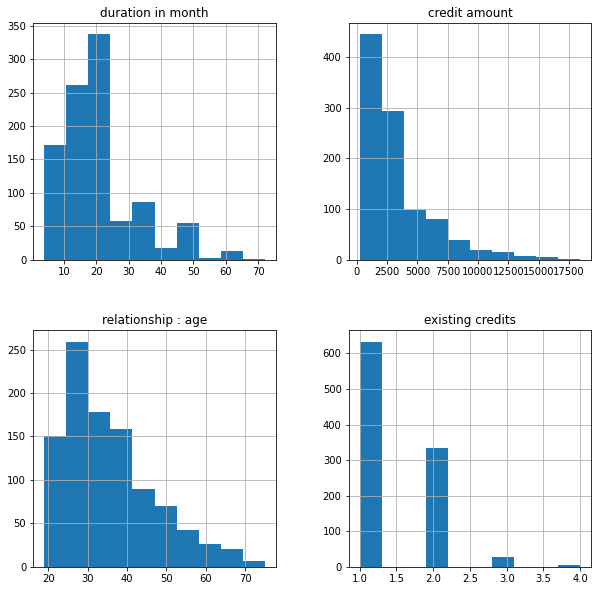

In [9]:
readable_df.hist(column=num_cols, figsize=[10,10])

### Plot numerical features as boxplots

<AxesSubplot:>

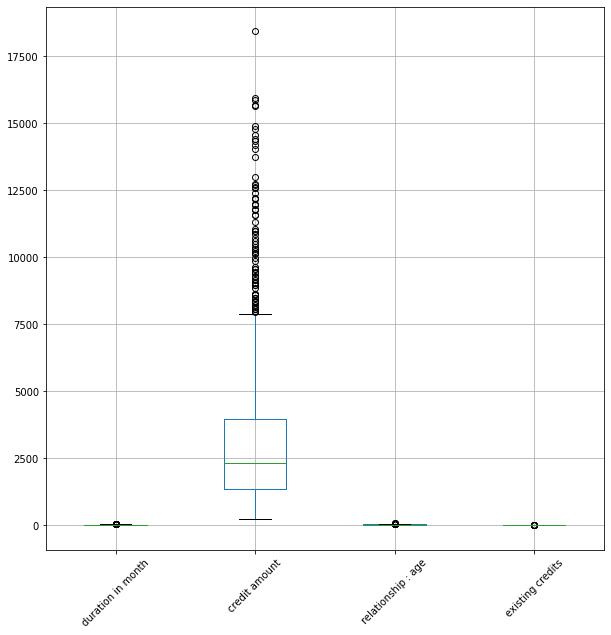

In [10]:
readable_df.boxplot(column=num_cols, rot=45, figsize=[10,10])

### Association Matrix

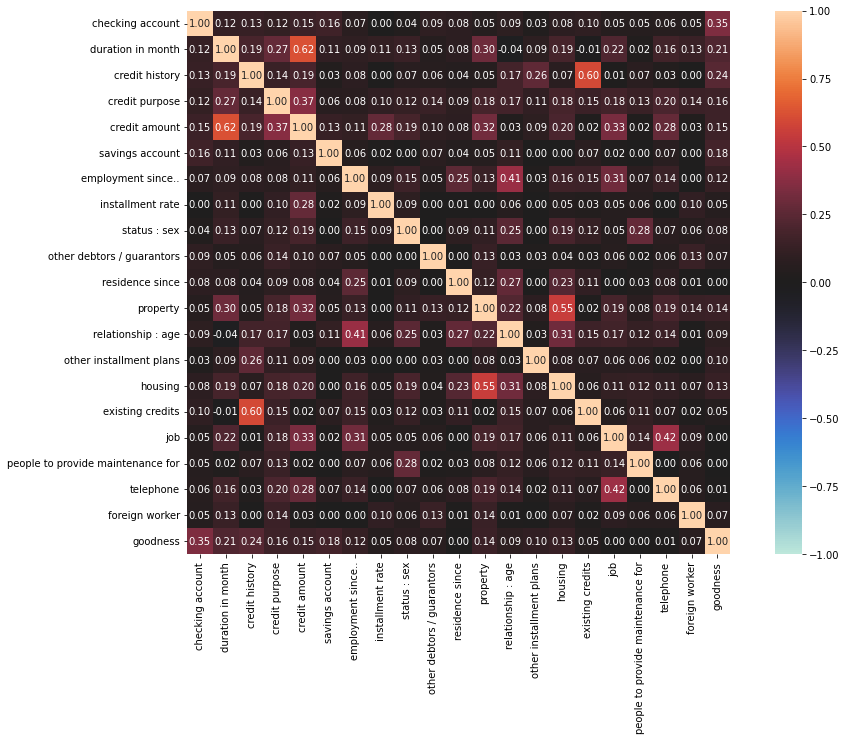

In [11]:
assoc_matrix = associations(dataset = readable_df, nom_nom_assoc = "cramer", figsize = (16,10))

### Absolute Associations of features with the class attribute in ascending order

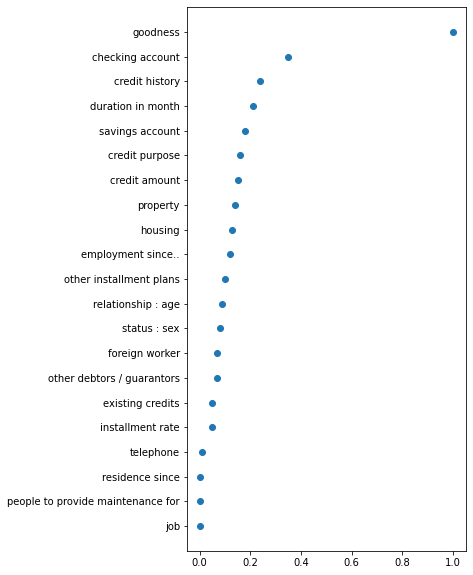

In [12]:
associations, _ = cluster_correlations(assoc_matrix["corr"])
corr = abs (round(associations["goodness"], 2) ).sort_values()
plt.figure(figsize=(5, 10))
plt.scatter(x = corr.values, y = corr.index)

In [13]:
corr

job                                  0.00
people to provide maintenance for    0.00
residence since                      0.00
telephone                            0.01
installment rate                     0.05
existing credits                     0.05
other debtors / guarantors           0.07
foreign worker                       0.07
status : sex                         0.08
relationship : age                   0.09
other installment plans              0.10
employment since..                   0.12
housing                              0.13
property                             0.14
credit amount                        0.15
credit purpose                       0.16
savings account                      0.18
duration in month                    0.21
credit history                       0.24
checking account                     0.35
goodness                             1.00
Name: goodness, dtype: float64

## Classification - Random Forest

### Data Preparation Step

Firstly, we don't want the sex (protected attribute):

In [14]:
df = df.drop(columns=['status : sex'])

In [15]:
# Note: the data needs to be shuffled, because all the 'good'
# scores are at the beginning
df = df.sample(frac=1).reset_index(drop=True)
n = len(df)

# Make some training and test data:
train_df = df.head(n = int(n*0.8))
test_df = df.tail(n = int(n*0.2))

X_train = train_df.drop(columns=['goodness'])
y_train = train_df['goodness']

X_test = test_df.drop(columns=['goodness'])
y_test = test_df['goodness']

X_train.head(n = 10)

,checking account,duration in month,credit history,credit purpose,credit amount,savings account,employment since..,installment rate,other debtors / guarantors,residence since,property,relationship : age,other installment plans,housing,existing credits,job,people to provide maintenance for,telephone,foreign worker
0,2,30,2,3,2991,5,5,2,1,4,3,25,3,2,1,3,2,1,2
1,4,10,2,3,1924,1,3,1,1,4,2,38,3,2,1,3,2,2,1
2,2,30,0,9,4280,2,3,4,1,4,3,26,3,1,2,2,2,1,2
3,1,48,4,1,6143,1,5,4,1,4,4,58,2,3,2,2,2,1,2
4,2,15,1,0,1264,2,3,2,1,2,2,25,3,1,1,3,2,1,2
5,4,12,2,1,2445,5,2,2,1,4,3,26,3,1,1,3,2,2,2
6,4,36,2,3,3835,5,5,2,1,4,1,45,3,2,1,2,2,2,2
7,4,12,4,6,3565,5,2,2,1,1,2,37,3,2,2,2,1,1,2
8,4,24,2,3,5943,5,2,1,1,1,3,44,3,2,2,3,2,2,2
9,2,24,2,1,12579,1,5,4,1,2,4,44,3,3,1,4,2,2,2


### Build Model

In [16]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print('prediction: ', clf.predict(X_test.head(n = 5)))

print('real: ', y_test.head(n = 5), sep='\n')

prediction:  ['1' '1' '1' '1' '0']
real: 
800    1
801    1
802    0
803    1
804    0
Name: goodness, dtype: object


### test accuracy of model

In [17]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.745

In [18]:
# ~73% accuracy is not fantastic. What to do?
# Let's try bootstrapping some trees :)

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.76

In [ ]:
confusion_matrix(y_test, y_pred)

In [19]:
# Hmm ~75% is not bad, but also not great.
# How do we improve without going into overfitting territory?
# Let's try the simplest 'Neural network': Logistic regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

accuracy_score(y_test, y_pred)

0.725

In [ ]:
confusion_matrix(y_test, y_pred)

In [25]:
# we are nearing ~80% accuracy
# let's try a svm

from sklearn.svm import SVC

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(),
        SVC(kernel='rbf', gamma=0.01, C=10))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred)

0.73

Wait, this averages out to less than the LogisticRegressions -> Maybe it is time to stop, and instead focus on the other tasks.

In [24]:
confusion_matrix(y_test, y_pred)

NameError: name 'confusion_matrix' is not defined

### Discussion

Several Points where subject of discussion within our Group:
* Which fields should be included, and which should not? Should there be some form of correction based on unfair results? -> We decided to not use sex, and did not have the time to deeply look into the data to look for potential unfair biases based on gender, age or immigration status.
* Should we use a random seed or set seed? A set seed  obviously increases Reproducability, however you could then optimize the seed for maximum accuracy, which falsifies the results.
* 

# Reproducing Results

In [ ]:
# Read in data form A2
df_german = pd.read_csv('df_german.csv')
df_german = df_german.drop(["Unnamed: 0"], axis=1)
df_german

In [ ]:
# One hot encoding for binary attributes
df_german = df_german.replace({'telephone': {'no': 0, 'yes': 1}})
df_german = df_german.replace({'foreign_worker': {'no': 0, 'yes': 1}})
df_german = df_german.replace({'customer_goodness': {'no': 0, 'yes': 1}})

In [ ]:
# Separate features from target class
X = df_german.drop('customer_goodness', axis = 1)
y = df_german.customer_goodness

In [ ]:
# One hot encoding for nominal features
dtype = X.dtypes
cat_features = dtype[dtype == 'object'].index

X = pd.get_dummies(X, columns= cat_features)

In [ ]:
X

We get 59 instead of 48 attributes!!!

Scaling of continuous features not mentioned in the paper, so we don't perform it. We applied the ten-fold cross-validation technique, using 90% of the data for training and the remaining 10% of the data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.9, random_state=0)

### Training an off-the-shelf logistic regression classifier in Python (Scikit-Learn)

In [ ]:
clf = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, y_train)

### Test with testing data (accuracy)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
print(
    "Coefficients of the attibutes:\nPersonal status and gender: single male:", clf.coef_[0, X.columns.get_loc("status_and_sex_male_married")],
    "\nPersonal status and gender: married male:", clf.coef_[0, X.columns.get_loc("status_and_sex_male_separated")],
    "\nPersonal status and gender: married/divorced female:", clf.coef_[0, X.columns.get_loc("status_and_sex_male_single")],
    "\nPersonal status and gender: divorced male", clf.coef_[0, X.columns.get_loc("status_and_sex_female_married_separated")])

We could not replicate the coefficients - they have very different trends than the ones mentioned in the paper